# Node ranking by PageRank

This notebook illustrates the ranking of the nodes of a graph by [PageRank](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#pagerank).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Ranking**

In [4]:
pagerank = skn.ranking.PageRank()

In [5]:
pagerank.fit(adjacency)

In [6]:
score = pagerank.score_

**Visualization**

In [7]:
from networkx import from_scipy_sparse_matrix, draw

In [8]:
graph = from_scipy_sparse_matrix(adjacency)

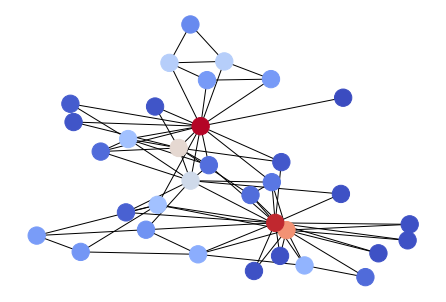

In [10]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color = np.log(score), cmap = 'coolwarm')

**Ranking with personalization**

In [11]:
target = [1,10]

In [12]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[target] = 1

In [13]:
pagerank.fit(adjacency, personalization)

In [14]:
score = pagerank.score_

**Visualization**

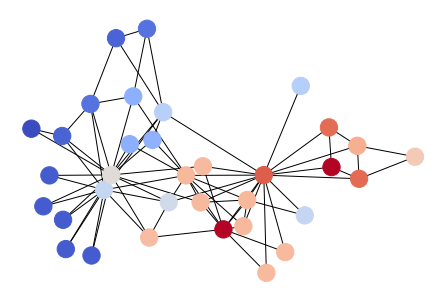

In [15]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color = np.log(score), cmap = 'coolwarm')

## Directed graphs

**Loading**

In [16]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Ranking**

In [17]:
pagerank.fit(adjacency)

In [18]:
score = pagerank.score_

**Visualization**

In [19]:
from networkx import DiGraph, from_scipy_sparse_matrix, draw

In [20]:
graph = from_scipy_sparse_matrix(adjacency, create_using=DiGraph())

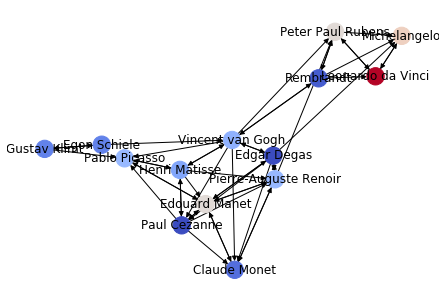

In [22]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color = np.log(score), cmap = 'coolwarm', labels = names)

**Ranking with personalization**

In [23]:
cezanne = 11

In [24]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[cezanne] = 1

In [25]:
pagerank.fit(adjacency, personalization)

In [26]:
score = pagerank.score_

**Visualization**

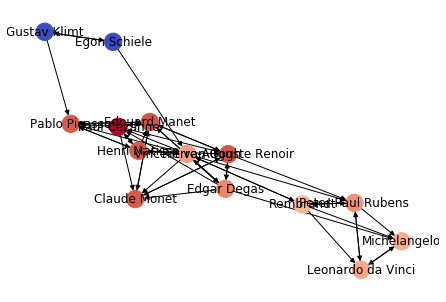

In [27]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color = np.log(score + 1e-10), cmap = 'coolwarm', labels = names)

## Bipartite graphs

**Loading**

In [28]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [29]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

**Ranking**

In [30]:
pagerank.fit(adjacency)

In [31]:
score = pagerank.score_

**Visualization**

In [32]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [33]:
graph = from_scipy_sparse_matrix(adjacency)

In [34]:
n,p = biadjacency.shape
pos = {i: (0,i) for i in range(n)}
pos.update({n + i: (2,i) for i in range(p)})

In [35]:
pos_labels = {i: (0.5,i) for i in range(n)}
pos_labels.update({n + i: (1.5,i) for i in range(p)})

In [36]:
names = movies
names.update({n + i: actors[i] for i in actors})

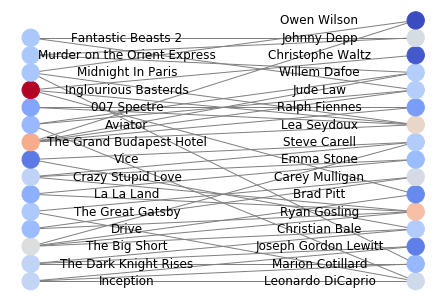

In [37]:
# Warning: If the image does not appear, run the cell again.
draw(graph, 
     pos = pos, 
     edge_color = 'grey',
     node_color = np.log(score), 
     cmap = 'coolwarm')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

**Ranking with personalization**

In [38]:
aviator = 9

In [39]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[aviator] = 1

In [40]:
pagerank.fit(adjacency, personalization)

In [42]:
score = pagerank.score_

**Visualization**

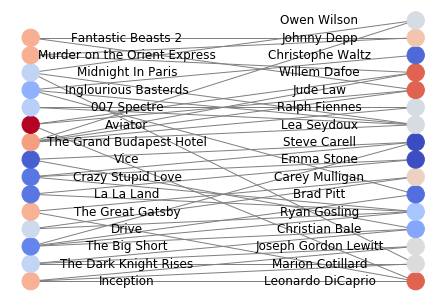

In [46]:
# Warning: If the image does not appear, run the cell again.
draw(graph, 
     pos = pos, 
     edge_color = 'grey',
     node_color = np.log(score), 
     cmap = 'coolwarm')
show_labels = draw_networkx_labels(graph,
                                   pos_labels,
                                   labels = names)